<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


-   Extract information from a given web site 
-   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd

Download the webpage at the url


In [3]:
#your code goes here
data  = requests.get(url).text

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(data,"html5lib")

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
table = soup.find('table')
l = []
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    language_name = cols[1].getText() 
    annual_average_salary = cols[3].getText()
    l.append([language_name, annual_average_salary])
      



Save the scrapped data into a file named _popular-languages.csv_


In [18]:
# your code goes here
df=pd.DataFrame(l)
df.columns = df.iloc[0]
df = df[1:]
#df['Average Annual Salary'].astype(str).astype(float)
df['Average Annual Salary'] = df['Average Annual Salary'].str.replace('$', '')
df['Average Annual Salary'] = df['Average Annual Salary'].str.replace(',', '').astype(int)
df.sort_values('Average Annual Salary',ignore_index = True , ascending=False, inplace = True)
df.set_index('Language', inplace=True)
df.head()

,Average Annual Salary
Language,
Swift,130801
Python,114383
C++,113865
Javascript,110981
Java,101013


In [19]:
import matplotlib.pyplot as plt

import numpy as np
my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.25)]*5

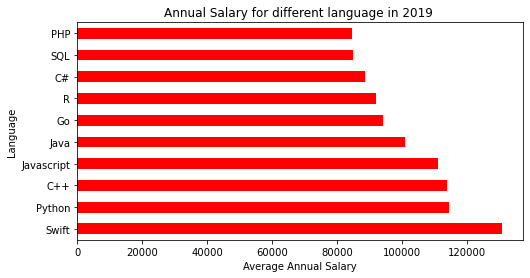

In [20]:
df.plot(kind='barh', figsize=(8, 4), legend=False , color = 'r' )

plt.xlabel('Average Annual Salary') # add to x-label to the plot
plt.ylabel('Language') # add y-label to the plot
plt.title('Annual Salary for different language in 2019 ') # add title to the plot


plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
